In [1]:
# 1 a



In [3]:
# 1 b
import pandas as pd
import os
path = r'C:\Users\saija\Downloads\supriya\AReM'
master = pd.DataFrame(columns=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23','data','type'])
for i in os.listdir(path):
    for j in os.listdir(path +'\\' + i):
        df=pd.read_csv(path + '\\' + i + '\\' + j)
        if i == 'bending1' or i=='bending2':
            if j == 'dataset1.csv' or j=='dataset2.csv':
                df['type'] = 'test'
            else:
                df['type'] = 'train'
        else:
            if j == 'dataset1.csv' or j=='dataset2.csv' or j=='dataset3.csv':
                df['type'] = 'test'
            else:
                df['type'] = 'train'
        df['data'] = i
        master = pd.concat([master,df])
master.drop('time',axis=1,inplace=True)
master.drop(' time',axis=1,inplace=True)
master

C:\Users\saija\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [6]:
# 1 c i


In [33]:
def generate_tim_domain_features(mdf):
    min_d = {}
    max_d = {}
    mean_d = {}
    median_d = {}
    first_quant = {}
    third_quant = {}
    i1=1
    for i in range(6):
        #print(i1)
        min_d['Min{}'.format(str(i1))] = mdf[mdf.columns[i]].min()
        max_d['Max{}'.format(str(i1))] = mdf[mdf.columns[i]].max()
        mean_d['Mean{}'.format(str(i1))] = mdf[mdf.columns[i]].mean()
        median_d['Median{}'.format(str(i1))] = mdf[mdf.columns[i]].median()
        first_quant['1st_quantile{}'.format(str(i1))] = mdf[mdf.columns[i]].quantile(0.25)
        third_quant['3rd_quantile{}'.format(str(i1))] = mdf[mdf.columns[i]].quantile(0.75)
        i1=i1+1
            
    mindf = pd.DataFrame([min_d])
    maxdf = pd.DataFrame([max_d])
    meandf = pd.DataFrame([mean_d])
    mediandf = pd.DataFrame([median_d])
    fqdf = pd.DataFrame([first_quant])
    tqdf = pd.DataFrame([third_quant])
    madya = pd.concat([mindf,maxdf,meandf,mediandf,fqdf,tqdf],axis=1)
    return madya

In [74]:
# 1 c ii

mdf = pd.DataFrame()
for folder in os.listdir(path):
    for file in os.listdir(path +'\\' + folder):
        df = pd.read_csv(path + '\\' + folder + '\\' + file)
        if 'time' in df.columns:
            df.drop('time',axis=1,inplace=True)
        if ' time' in df.columns:
            df.drop(' time',axis=1,inplace=True)
        mindf = generate_tim_domain_features(df)
        mindf['Activity'] = folder
        mdf=mdf.append(mindf,ignore_index=True,sort=False) 
mdf       

,Min1,Min2,Min3,Min4,Min5,Min6,Max1,Max2,Max3,Max4,...,1st_quantile4,1st_quantile5,1st_quantile6,3rd_quantile1,3rd_quantile2,3rd_quantile3,3rd_quantile4,3rd_quantile5,3rd_quantile6,Activity
0,37.25,0.0,4.00,0.0,27.25,0.0,45.00,1.30,29.50,7.23,...,0.0000,33.0000,0.00,42.0000,0.5000,23.2500,1.1200,36.00,1.3000,bending1
1,38.00,0.0,2.00,0.0,27.67,0.0,45.67,1.22,29.50,5.76,...,0.0000,32.0000,0.00,43.6700,0.5000,22.2500,1.1450,34.50,1.3000,bending1
2,35.00,0.0,6.50,0.0,29.00,0.0,47.40,1.70,29.75,4.44,...,0.0000,35.3625,0.00,45.0000,0.5000,24.0000,0.8300,36.50,0.9400,bending1
3,33.00,0.0,8.50,0.0,20.00,0.0,47.75,3.00,30.00,5.15,...,0.4300,30.4575,0.00,45.0000,1.1200,24.3725,1.3000,36.33,1.0000,bending1
4,33.00,0.0,3.00,0.0,23.67,0.0,45.75,2.83,28.25,6.42,...,0.4300,28.4575,0.00,42.7500,0.7100,22.0625,1.1200,31.25,0.5000,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,0.0,5.00,0.0,6.00,0.0,46.25,12.68,23.75,9.20,...,2.0500,14.2500,2.05,38.2500,5.7225,17.2500,4.1950,18.33,4.3050,walking
84,21.50,0.0,6.50,0.0,6.33,0.0,51.00,12.21,23.33,9.09,...,2.0575,14.2375,2.12,38.0625,5.6250,17.6700,3.8400,18.25,4.5000,walking
85,18.33,0.0,7.67,0.0,6.67,0.0,47.67,12.48,23.33,9.01,...,2.0500,13.7500,2.05,38.0000,5.7450,17.5000,4.2450,18.00,4.3200,walking
86,18.33,0.0,5.50,0.0,6.50,0.0,45.75,15.37,24.00,9.18,...,2.0375,14.0000,2.12,38.0000,5.7675,17.3725,4.1575,18.25,4.2600,walking


In [78]:
# 1 c iii
print(mdf.drop('Activity',axis=1).std())

boot_list = {}

import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

for i in mdf:
    if i == 'Activity':
        continue
    mdf_boot = mdf[i]

    samples = np.random.choice(mdf_boot,size = 70)
    np.std([samples], axis=1)
    stdev_results = bs.bootstrap(samples, stat_func=bs_stats.std,alpha=0.1)
    #print('Bootstrapped stdev should be: {}'.format(stdev))
    boot_list[i] = stdev_results
    #print('\t' + str(stdev_results))

Min1             9.569975
Min2             0.000000
Min3             2.956462
Min4             0.000000
Min5             6.124001
Min6             0.045838
Max1             4.394362
Max2             5.062729
Max3             4.875137
Max4             2.183625
Max5             5.741238
Max6             2.518921
Mean1            5.335718
Mean2            1.574164
Mean3            4.008380
Mean4            1.166114
Mean5            5.675593
Mean6            1.154812
Median1          5.440054
Median2          1.412244
Median3          4.036396
Median4          1.145586
Median5          5.813782
Median6          1.086474
1st_quantile1    6.153590
1st_quantile2    0.946386
1st_quantile3    4.220658
1st_quantile4    0.843620
1st_quantile5    6.096465
1st_quantile6    0.758584
3rd_quantile1    5.138925
3rd_quantile2    2.125266
3rd_quantile3    4.171628
3rd_quantile4    1.552504
3rd_quantile5    5.531720
3rd_quantile6    1.523599
dtype: float64


In [79]:
boot_list

{'Min1': 10.179910263828058    (8.723196809431803, 11.877434400660064),
 'Min2': 0.0    (0.0, 0.0),
 'Min3': 3.040155339747612    (2.897468940144683, 3.2356538837418802),
 'Min4': 0.0    (0.0, 0.0),
 'Min5': 5.860147983434813    (4.415256536565152, 7.590273348962663),
 'Min6': 0.05102640372935388    (0.01496277663205256, 0.10205280745870776),
 'Max1': 4.474135054934743    (3.560232356137429, 5.5454467696201935),
 'Max2': 5.108912222972794    (4.757843847739105, 5.58454470941933),
 'Max3': 4.1537155459581845    (3.369263270343019, 5.091533146334693),
 'Max4': 2.16753141351433    (1.974966890934215, 2.404487180614299),
 'Max5': 5.4287702989888675    (4.4899304307915715, 6.541337670518405),
 'Max6': 2.481028181366486    (2.2652000903560525, 2.7446838219471763),
 'Mean1': 5.117432953727497    (4.388231935145825, 5.944068075190925),
 'Mean2': 1.4363428538971827    (1.2565161244695189, 1.6808387681467325),
 'Mean3': 4.115799073949864    (3.5899338616695085, 4.764802443782165),
 'Mean4': 1.21

In [80]:
# 1 c iv
# taking min mean and max
feature_list = [i for i in mdf.columns if 'Min' in i or 'Max' in i or 'Mean' in i] + ['Activity']
mdf_imp_var = mdf[feature_list]

In [81]:
# d i
f_list = [i for i in mdf_imp_var.columns if '1' in i or '2' in i or '6' in i] + ['Activity']
df_6 = mdf_imp_var[f_list]

In [91]:
df_6['Activity'].replace('bending1',1,inplace=True)
df_6['Activity'].replace('bending2',1,inplace=True)
df_6['Activity'].replace('walking',0,inplace=True)
df_6['Activity'].replace('cycling',0,inplace=True)
df_6['Activity'].replace('lying',0,inplace=True)
df_6['Activity'].replace('sitting',0,inplace=True)
df_6['Activity'].replace('standing',0,inplace=True)

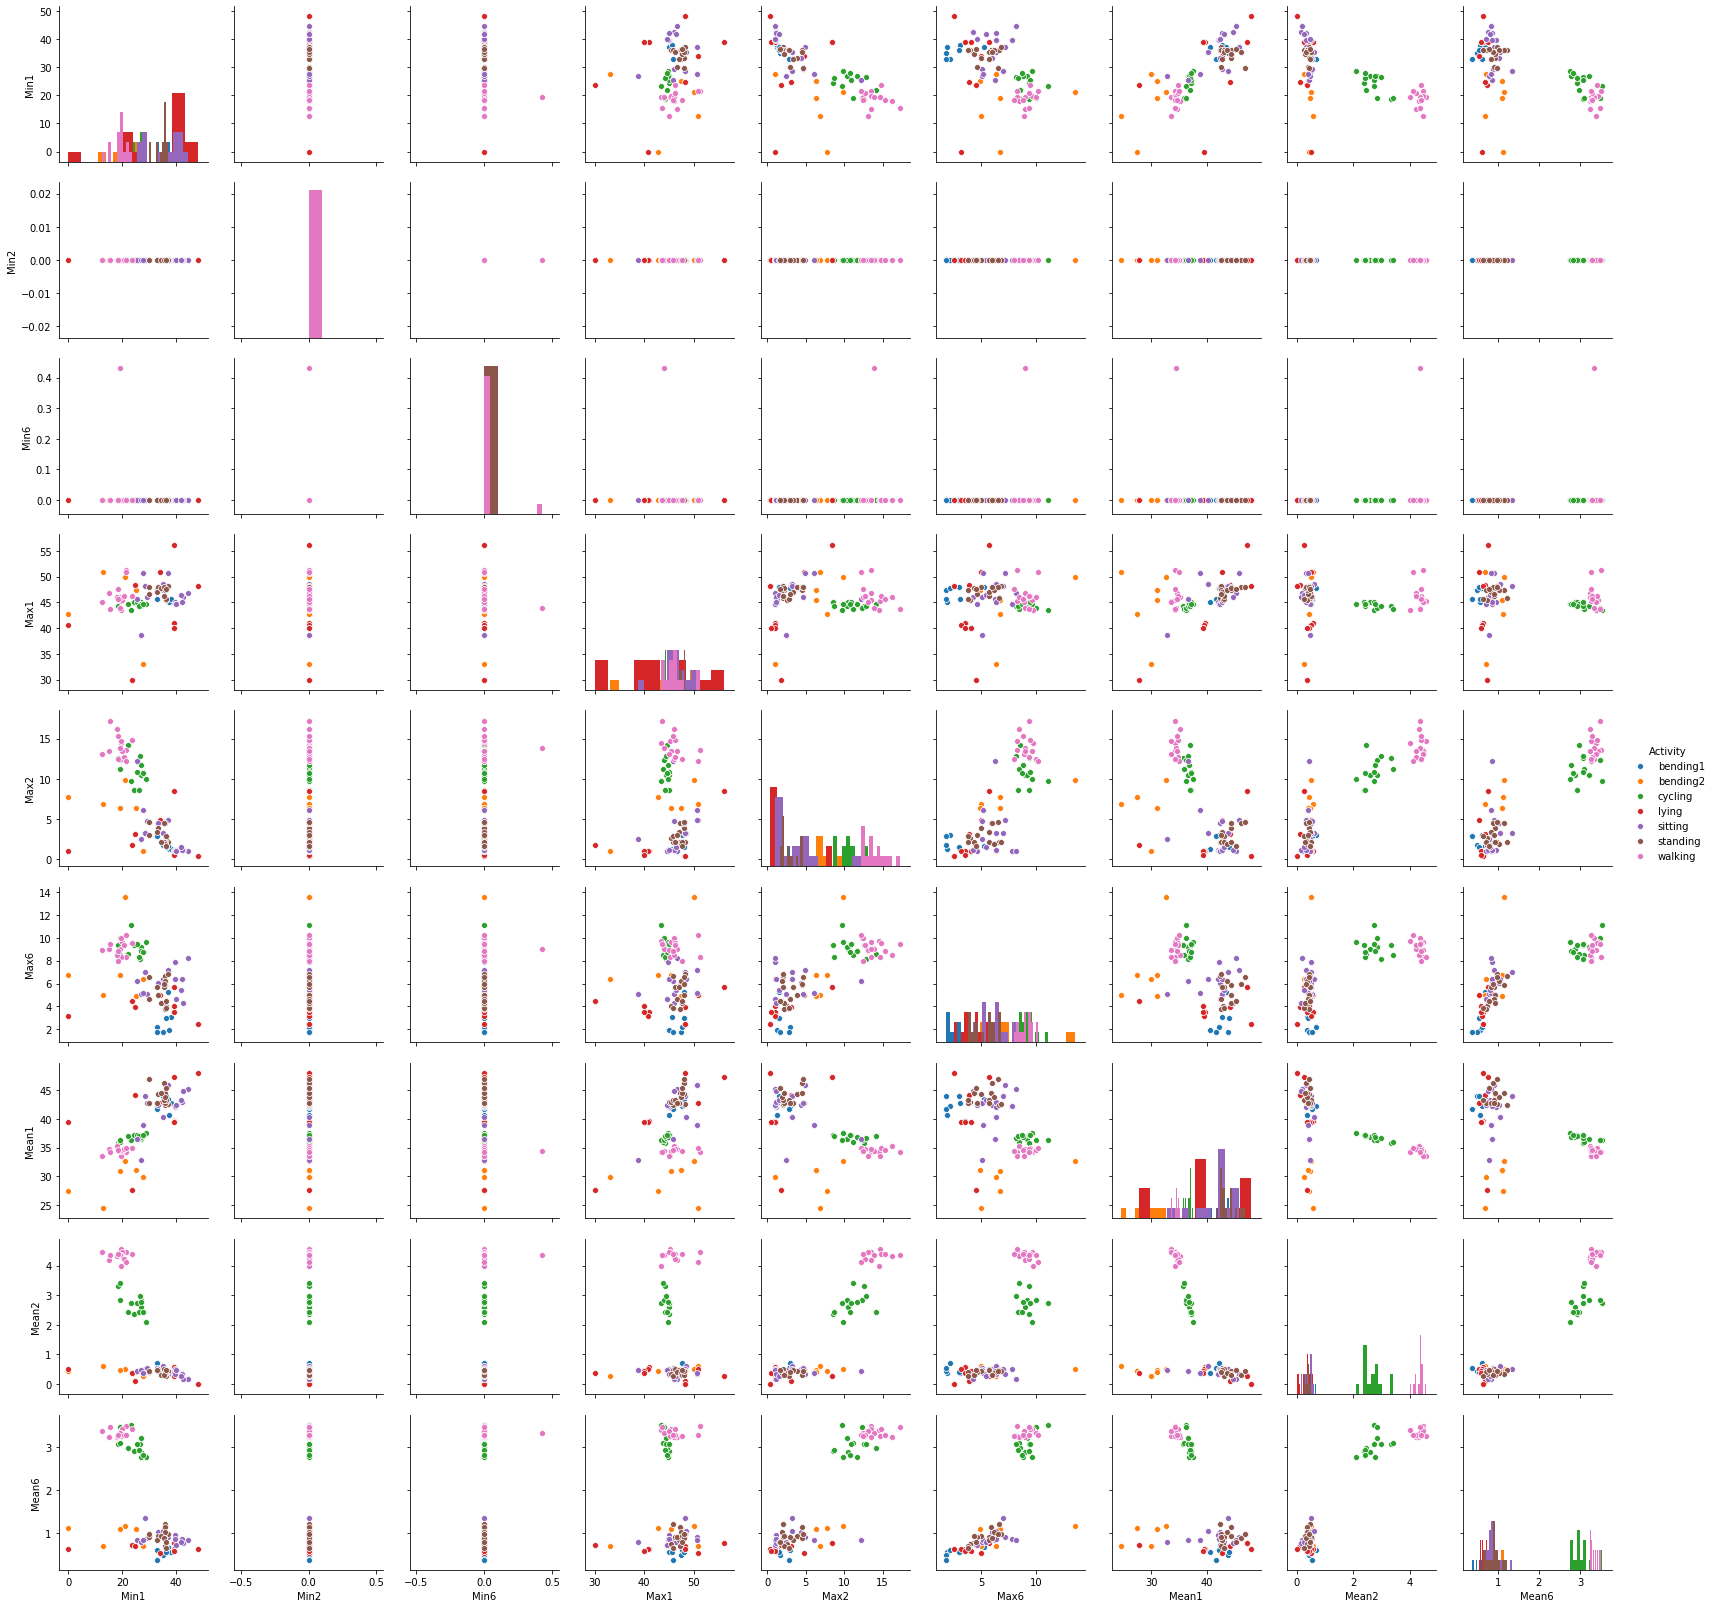

In [82]:
import seaborn as sns
sns.pairplot(df_6,hue="Activity",diag_kind="hist")

In [105]:
combined_df.columns

Index(['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'index', 'avg_rss12', 'var_rss12', 'avg_rss13',
       'var_rss13', 'avg_rss23', 'var_rss23'],
      dtype='object')

In [138]:
# d ii
main_df= pd.DataFrame()
for folder in os.listdir(path):
    for file in os.listdir(path +'\\' + folder):
        df=pd.read_csv(path + '\\' + i + '\\' + file)
        if 'time' in df.columns:
            df.drop('time',axis=1,inplace=True)
        if ' time' in df.columns:
            df.drop(' time',axis=1,inplace=True)
        min_d = {}
        max_d = {}
        mean_d = {}
        d1 = df[:240]
        d2=df[240:]
        d2.reset_index(inplace=True)
        combined_df = pd.concat([d1,d2],axis=1)
        combined_df.set_index('index',inplace=True) 
        madya = min_max_mean(combined_df,2)
        madya['Activity'] = folder
        main_df = pd.concat([main_df,madya])
        
main_df.reset_index(inplace=True)
main_df.drop('index',axis=1,inplace=True)
main_df

,Min1,Min2,Min3,Min4,Min5,Min6,Min7,Min8,Min9,Min10,...,Mean4,Mean5,Mean6,Mean7,Mean8,Mean9,Mean10,Mean11,Mean12,Activity
0,22.33,19.33,0.00,0.00,5.50,7.33,0.00,0.0,7.33,6.75,...,4.016500,15.919542,15.506625,3.234583,3.373042,16.556958,16.685375,3.387500,3.400750,bending1
1,18.67,12.50,0.43,0.00,5.75,7.25,0.00,0.0,7.25,8.75,...,4.500708,15.554458,15.561083,3.370083,3.331625,16.332917,16.749833,3.378708,3.378250,bending1
2,15.00,21.50,0.00,0.00,7.25,5.00,0.00,0.0,7.00,7.00,...,3.828750,15.481042,14.965333,3.138167,3.084458,16.244667,16.257417,3.281958,3.206833,bending1
3,18.00,23.00,0.00,0.00,8.67,5.67,0.00,0.0,6.25,6.50,...,4.346625,15.441792,15.482667,2.904958,3.240750,16.199333,16.003083,3.106583,3.377333,bending1
4,22.33,20.75,0.00,0.43,5.00,8.00,0.00,0.0,8.25,6.00,...,4.239625,15.125750,15.352292,3.270958,3.143167,16.430958,16.168167,3.146333,3.430208,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,22.33,20.75,0.00,0.43,5.00,8.00,0.00,0.0,8.25,6.00,...,4.239625,15.125750,15.352292,3.270958,3.143167,16.430958,16.168167,3.146333,3.430208,walking
84,21.50,21.75,0.00,0.00,9.00,6.50,0.00,0.0,6.33,7.33,...,4.014167,15.595917,15.453125,3.181292,3.004292,15.819292,16.175167,3.334125,3.225917,walking
85,18.33,20.33,0.00,0.00,8.33,7.67,0.00,0.0,9.50,6.67,...,4.461708,15.158125,15.967667,3.249958,3.146667,15.899250,15.829625,3.248417,3.274750,walking
86,18.33,22.67,0.00,0.00,8.00,5.50,0.00,0.0,6.50,7.33,...,4.539917,15.181958,15.165375,3.131417,3.159583,16.114250,15.996875,3.169625,3.409458,walking


In [143]:
df_12 = main_df[['Min1','Min2','Min12','Max1','Max2','Max12','Mean1','Mean2','Mean12','Activity']]

In [144]:
df_12

,Min1,Min2,Min12,Max1,Max2,Max12,Mean1,Mean2,Mean12,Activity
0,22.33,19.33,0.00,42.50,43.50,8.86,34.334833,34.120708,3.400750,bending1
1,18.67,12.50,0.00,45.00,43.25,8.96,33.762958,33.256500,3.378250,bending1
2,15.00,21.50,0.00,45.33,46.75,8.26,33.591625,35.729542,3.206833,bending1
3,18.00,23.00,0.00,45.67,46.00,8.50,35.236083,35.150583,3.377333,bending1
4,22.33,20.75,0.00,46.00,46.25,9.39,34.966250,34.560417,3.430208,bending1
...,...,...,...,...,...,...,...,...,...,...
83,22.33,20.75,0.00,46.00,46.25,9.39,34.966250,34.560417,3.430208,walking
84,21.50,21.75,0.00,45.67,51.00,10.21,34.737042,35.134583,3.225917,walking
85,18.33,20.33,0.00,45.00,47.67,8.01,33.886458,34.779625,3.274750,walking
86,18.33,22.67,0.47,44.00,45.75,8.84,34.836458,34.363292,3.409458,walking


In [145]:
df_12['Activity'].replace('bending1',1,inplace=True)
df_12['Activity'].replace('bending2',1,inplace=True)
df_12['Activity'].replace('walking',0,inplace=True)
df_12['Activity'].replace('cycling',0,inplace=True)
df_12['Activity'].replace('lying',0,inplace=True)
df_12['Activity'].replace('sitting',0,inplace=True)
df_12['Activity'].replace('standing',0,inplace=True)

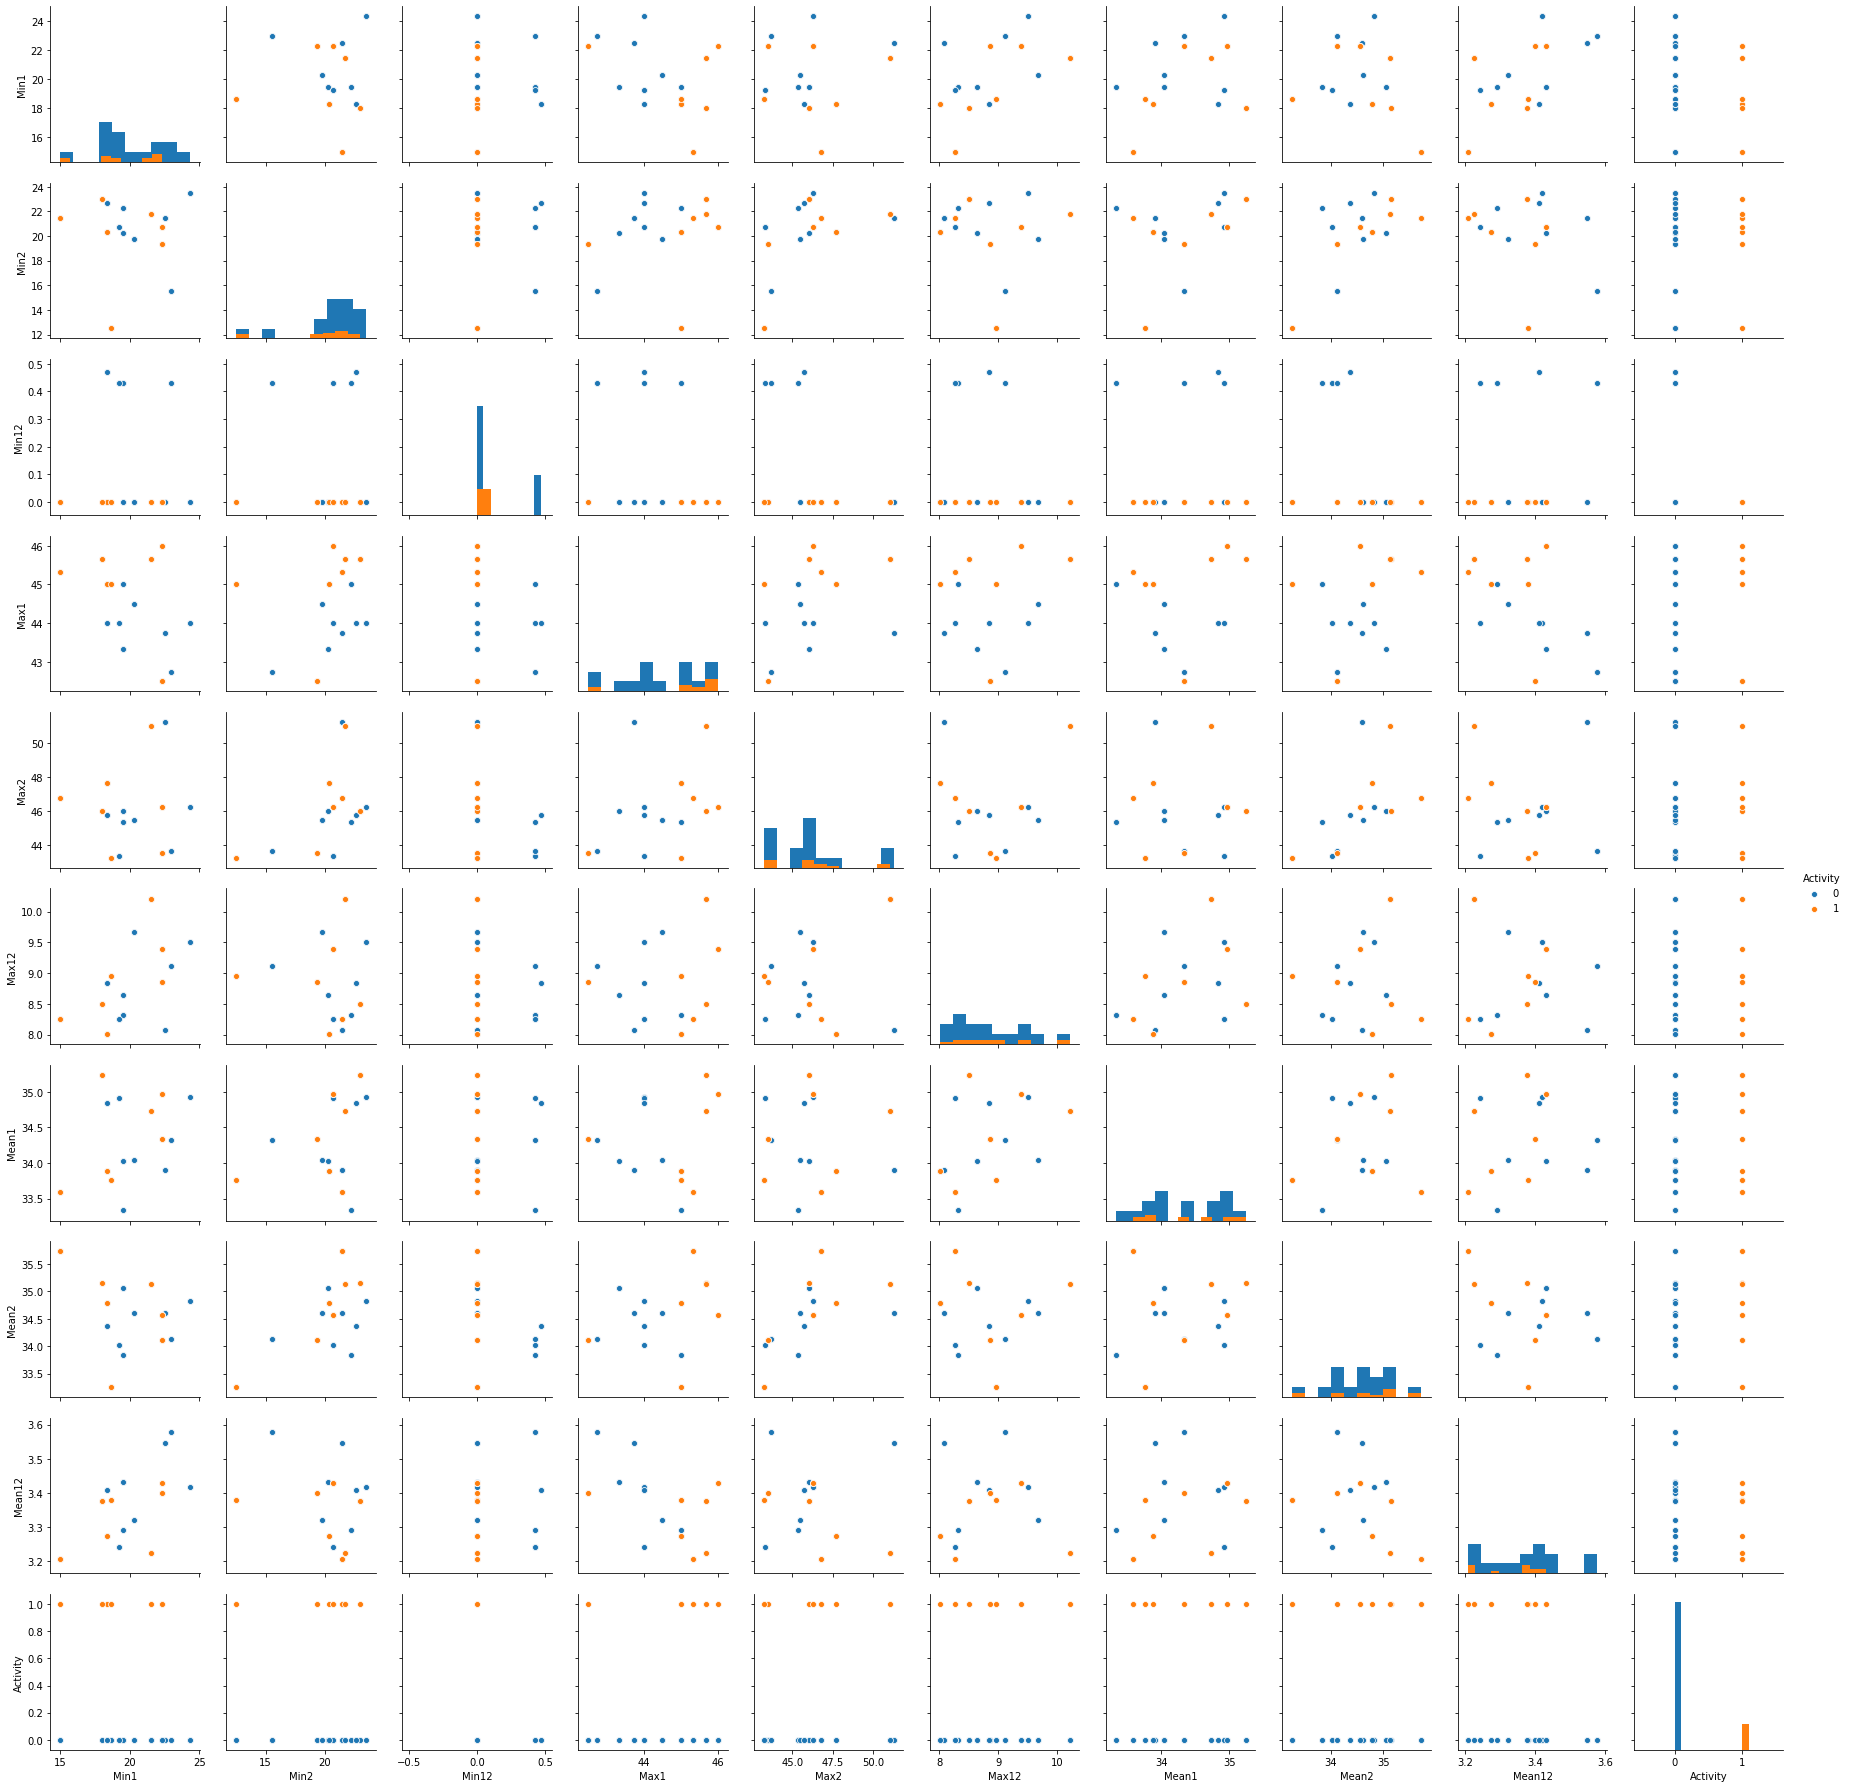

In [146]:
sns.pairplot(df_12,hue="Activity",diag_kind="hist")

In [111]:
def min_max_mean(mdf,l):
    min_d = {}
    max_d = {}
    mean_d = {}
    i1=1
    for i in range(6):
        if l == 1:
            #print(i1)
            min_d['Min{}'.format(str(i1))] = mdf[mdf.columns[i]].min()
            max_d['Max{}'.format(str(i1))] = mdf[mdf.columns[i]].max()
            mean_d['Mean{}'.format(str(i1))] = mdf[mdf.columns[i]].mean()
            i1=i1+1
        else:
            for j in range(l):
                #print(mdf[mdf.columns[i]].min())
                min_d['Min{}'.format(str(i1))] = mdf[mdf.columns[i]].min().tolist()[j]
                #min_d['Min{}'.format(str(i1))] = mdf[i].min().tolist()[j]
                max_d['Max{}'.format(str(i1))] = mdf[mdf.columns[i]].max().tolist()[j]
                mean_d['Mean{}'.format(str(i1))] = mdf[mdf.columns[i]].mean().tolist()[j]
                i1=i1+1
            
    mindf = pd.DataFrame([min_d])
    maxdf = pd.DataFrame([max_d])
    meandf = pd.DataFrame([mean_d])
    #print(mindf.shape)
    madya = pd.concat([mindf,maxdf,meandf],axis=1)
    return madya

In [219]:
#koncham_pedadi = pd.DataFrame()
import pandas as pd
import os
df_list = []
df_list_features =[]
for l in range(1,21):
    print(l)
    len1 = 480//l
    len1=int(len1)
    #mdf = df[:len1]
    act_num = 0
    #path = r'C:\Users\supri\Downloads\AReM (1)\AReM'
    path = r'C:\Users\saija\Downloads\supriya\AReM'
    inkoncham_peddadi = pd.DataFrame(columns=['activity','data'])
    for folder in os.listdir(path):
        for file in os.listdir(path +'\\' + folder):
            df = pd.read_csv(path + '\\' + folder + '\\' + file)
            if 'time' in df.columns:
                df.drop('time',axis=1,inplace=True)
            if ' time' in df.columns:
                df.drop(' time',axis=1,inplace=True)
            mdf = df[:len1]
            start= len1
            end=len1 + len1
            #print(df.columns)
            for i in range(1,l):
                if end <= len(df):
                    df1 = df[start:end]
                    #print(df1)
                    df1.reset_index(inplace=True)
                    mdf = pd.concat([mdf,df1],axis=1)
                    #print(mdf.isnull().any())
                    #for k in mdf:
                     #   print(k,mdf[k].min())

                else:
                    df1 = df[start:]
                    df1.reset_index(inplace=True)
                    mdf = pd.concat([mdf,df1],axis=1)
                    continue
                start=start+len1
                end=end+len1
            if 'index' in mdf.columns:
                mdf.drop('index',axis=1,inplace=True)
                #for k in mdf:
                    #print(mdf[k])
            koncham_peddadi = min_max_mean(mdf,l)
            inkoncham_peddadi = pd.concat([inkoncham_peddadi,koncham_peddadi])
            inkoncham_peddadi['activity'].iloc[act_num] = folder
            inkoncham_peddadi['data'].iloc[act_num] = file[:-4]           
            if folder == 'bending1' or folder=='bending2':
                if file == 'dataset1.csv' or file=='dataset2.csv':
                    inkoncham_peddadi['data'].iloc[act_num] = 'test'
                else:
                    inkoncham_peddadi['data'].iloc[act_num] = 'train'
            else:
                if file == 'dataset1.csv' or file=='dataset2.csv' or file=='dataset3.csv':
                    inkoncham_peddadi['data'].iloc[act_num] = 'test'
                else:
                    inkoncham_peddadi['data'].iloc[act_num] = 'train'
            #inkoncham_peddadi.drop('data',axis=1,inplace=True)
            inkoncham_peddadi['activity'].replace('bending1',int(1),inplace=True)
            inkoncham_peddadi['activity'].replace('bending2',int(1),inplace=True)
            inkoncham_peddadi['activity'].replace('walking',int(0),inplace=True)
            inkoncham_peddadi['activity'].replace('cycling',int(0),inplace=True)
            inkoncham_peddadi['activity'].replace('lying',int(0),inplace=True)
            inkoncham_peddadi['activity'].replace('sitting',int(0),inplace=True)
            inkoncham_peddadi['activity'].replace('standing',int(0),inplace=True)  
            act_num+=1
            #print(koncham_peddadi)
            df_list.append(mdf)
    df_list_features.append(inkoncham_peddadi)
inkoncham_peddadi.reset_index(inplace=True)
inkoncham_peddadi.drop('index',axis=1,inplace=True)

1


C:\Users\saija\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\saija\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report



LP_Acc = pd.DataFrame({'Accuracy Score':[],'L':[],'P':[],'Columns':[]})
class_list=[]
rfv_gridscr= []
n_features = []
feature_list = []
n=0
for df in df_list_features:
    df = df.loc[:,~df.columns.duplicated()]
    print(n)
    
    clf1 = LogisticRegression(solver='lbfgs',C=10000000)
    rfv = RFECV(estimator=clf1,cv=StratifiedKFold(5))
    rfv.fit(df.drop(['activity','data'],axis=1),df['activity'])

    feature_list.append(rfv.get_support(indices=True))
    l1 = list(rfv.get_support(indices=True))
    x=['activity','data']
    x = x + list(df.columns[l1])

    rfv_gridscr.append(rfv.grid_scores_[rfv.n_features_])        
    n_features.append(rfv.n_features_)
    
    train = df[x][df['data']=='train']
    train = train.loc[:,~train.columns.duplicated()]
    test = df[x][df['data']=='test']
    test = test.loc[:,~test.columns.duplicated()]
    test.drop('data',inplace=True,axis=1)
    train.drop('data',inplace=True,axis=1)
    clf2 = LogisticRegression(solver='lbfgs',C=10000000,max_iter=1000)
    clf2.fit(train.drop('activity',axis=1),train['activity'])
    y_pred = clf2.predict(test.drop('activity',axis=1))
    y_pred1 = clf2.predict(train.drop('activity',axis=1))
    p = train.drop('activity',axis=1).shape[1]
    l = n
    Acc_Score=accuracy_score(test['activity'],y_pred)
    df_1 = {'Accuracy Score':Acc_Score,'L':l,'P':p,'Columns':x}    
    LP_Acc=LP_Acc.append(df_1,ignore_index=True,sort=False)
    class_list.append(classification_report(y_pred1,train['activity']))
    n=n+1

0
(69, 8)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
1
(69, 13)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
2
(69, 7)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
3
(69, 4)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
4
(69, 5)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
5
(69, 9)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
6
(69, 9)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
7
(69, 11)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
8
(69, 6)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
9
(69, 61)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
10
(69, 4)
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Name: activity, dtype: float64
11
(69, 6)
0    1.0
0    1.0
0    1.0
0    1.0
0  

AUC: 1.00


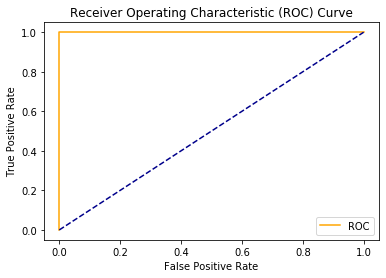

In [151]:
# d iv choose the df with best grid scores

train = df_list_features[0][LP_Acc['Columns'][0]][df_list_features[0]['data']=='train']
train = train.loc[:,~train.columns.duplicated()]
test = df_list_features[0][LP_Acc['Columns'][0]][df_list_features[0]['data']=='test']
test = test.loc[:,~test.columns.duplicated()]
test.drop('data',inplace=True,axis=1)
train.drop('data',inplace=True,axis=1)

clf1 = LogisticRegression(solver='lbfgs',C=10000000)
clf1.fit(train.drop('activity',axis=1),train['activity'])

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
trainy = train['activity']
trainX= train.drop('activity',axis=1)
probs = clf1.predict_proba(trainX)
probs = probs[:, 1]
auc = roc_auc_score(trainy, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(trainy, probs)

# import statsmodels.api as sm
# logit_model=sm.Logit(train['activity'],train.drop('activity',axis=1))
# result=logit_model.fit()
# result.summary2()


import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)
    

In [153]:
# d v
clf2 = LogisticRegression(solver='lbfgs',C=10000000)
clf2.fit(test.drop('activity',axis=1),test['activity'])
y_pred2 = clf2.predict(test.drop('activity',axis=1))
print(accuracy_score(y_pred2,test['activity']))

1.0


In [154]:
# d vi

In [2]:
# # d vii
# from sklearn.metrics import confusion_matrix
# class_1 = train[train.activity==1]
# class_0  = train[train.activity==0]
# from sklearn.utils import resample
# class_1 = resample(class_1,replace=True,n_samples=len(class_0),random_state=27)
# train_upsampled = pd.concat([class_0,class_1])
# clf1 = LogisticRegression(solver='lbfgs',C=10000000)
# clf1.fit(train_upsampled.drop('activity',axis=1),train_upsampled['activity'])
# y_pred = clf1.predict(test.drop('activity',axis=1))
# print(accuracy_score(y_pred,test['activity']))
# print(confusion_matrix(y_pred,test['activity']))

# trainy = train_upsampled['activity']
# trainX= train.drop('activity',axis=1)
# probs = clf1.predict_proba(trainX)
# probs = probs[:, 1]
# auc = roc_auc_score(trainy, probs)
# print('AUC: %.2f' % auc)

# fpr, tpr, thresholds = roc_curve(trainy, probs)


# import matplotlib.pyplot as plt
# def plot_roc_curve(fpr, tpr):
#     plt.plot(fpr, tpr, color='orange', label='ROC')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend()
#     plt.show()


# plot_roc_curve(fpr, tpr)

In [220]:
df_list_features[0]

,Max1,Max2,Max3,Max4,Max5,Max6,Mean1,Mean2,Mean3,Mean4,Mean5,Mean6,Min1,Min2,Min3,Min4,Min5,Min6,activity,data
0,45.00,1.30,29.50,7.23,38.25,1.92,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583,37.25,0.0,4.00,0.0,27.25,0.0,1.0,test
0,45.67,1.22,29.50,5.76,38.50,3.11,42.812812,0.372438,20.096979,0.876438,33.024583,0.571083,38.00,0.0,2.00,0.0,27.67,0.0,1.0,test
0,47.40,1.70,29.75,4.44,38.50,1.79,43.954500,0.426250,22.122354,0.497313,35.588458,0.493292,35.00,0.0,6.50,0.0,29.00,0.0,1.0,train
0,47.75,3.00,30.00,5.15,38.67,2.18,42.179813,0.696042,22.183625,0.989917,33.493917,0.613521,33.00,0.0,8.50,0.0,20.00,0.0,1.0,train
0,45.75,2.83,28.25,6.42,37.50,1.79,41.678063,0.535979,19.006562,0.841875,29.857083,0.383292,33.00,0.0,3.00,0.0,23.67,0.0,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,46.25,12.68,23.75,9.20,25.50,9.39,34.763333,4.223792,15.239021,3.207062,16.299563,3.288271,20.75,0.0,5.00,0.0,6.00,0.0,0.0,train
0,51.00,12.21,23.33,9.09,25.00,10.21,34.935813,4.115750,15.524521,3.092792,15.997229,3.280021,21.50,0.0,6.50,0.0,6.33,0.0,0.0,train
0,47.67,12.48,23.33,9.01,24.00,8.01,34.333042,4.396958,15.562896,3.198312,15.864438,3.261583,18.33,0.0,7.67,0.0,6.67,0.0,0.0,train
0,45.75,15.37,24.00,9.18,23.25,8.86,34.599875,4.398833,15.173667,3.145500,16.055563,3.289542,18.33,0.0,5.50,0.0,6.50,0.0,0.0,train


In [223]:
# 1 e 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.preprocessing import normalize



LP_Acc = pd.DataFrame({'Accuracy Score':[],'L':[]})
class_list=[]
rfv_gridscr= []
n_features = []
feature_list = []

n=0
for df in df_list_features:
    c_dict = {}
    df = df.loc[:,~df.columns.duplicated()]
    print(n)
    
    train = df[df['data']=='train']
    train = train.loc[:,~train.columns.duplicated()]
    test = df[df['data']=='test']
    test = test.loc[:,~test.columns.duplicated()]
    test.drop('data',inplace=True,axis=1)
    train.drop('data',inplace=True,axis=1)
    
    train_norm = normalize(train.drop('activity',axis=1))
    clf2 = LogisticRegressionCV(penalty='l1', solver='liblinear',cv=5)
    clf2.fit(train_norm,train['activity'])
    y_pred = clf2.predict(test.drop('activity',axis=1))
    y_pred1 = clf2.predict(train.drop('activity',axis=1))

    p = train.drop('activity',axis=1).shape[1]
    l = n
    Acc_Score=accuracy_score(test['activity'],y_pred)
    c_dict[C] = Acc_Score
           
        
    class_list.append(classification_report(y_pred1,train['activity']))
    n=n+1
    df_1 = {'Accuracy Score':Acc_Score,'L':n} 
    LP_Acc=LP_Acc.append(df_1,ignore_index=True,sort=False)

0
1
2


C:\Users\saija\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\saija\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [222]:
LP_Acc

,Accuracy Score,L,C
0,1.000000,1.0,70.0
1,0.368421,2.0,70.0
2,0.210526,3.0,70.0
3,0.315789,4.0,70.0
4,0.315789,5.0,70.0
5,0.263158,6.0,70.0
6,1.000000,7.0,70.0
7,0.947368,8.0,70.0
8,1.000000,9.0,70.0
9,0.842105,10.0,70.0


In [208]:
from sklearn.linear_model import LogisticRegressionCV
clf2 = LogisticRegressionCV(penalty='l1', solver='liblinear')
clf2.fit(train.drop('activity',axis=1),train['activity'])

C:\Users\saija\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\saija\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [212]:
y_pred = clf2.predict(test.drop('activity',axis=1))

In [213]:
accuracy_score(y_pred,test['activity'])

0.7894736842105263

In [159]:
LP_Acc

,Accuracy Score,L,C
0,0.947368,1.0,70.0
1,0.947368,2.0,66.0
2,0.947368,3.0,1.0
3,0.947368,4.0,1.0
4,0.947368,5.0,1.0
5,1.000000,6.0,26.0
6,0.947368,7.0,1.0
7,0.947368,8.0,1.0
8,0.947368,9.0,1.0
9,0.947368,10.0,1.0


In [169]:
# e ii
#compare these

In [1]:
# # f i 
# #koncham_pedadi = pd.DataFrame()
# import pandas as pd
# import os
# df_list = []
# df_multi_list =[]
# for l in range(1,21):
#     print(l)
#     len1 = 480//l
#     len1=int(len1)
#     #mdf = df[:len1]
#     act_num = 0
#     #path = r'C:\Users\supri\Downloads\AReM (1)\AReM'
#     path = r'C:\Users\saija\Downloads\supriya\AReM'
#     inkoncham_peddadi = pd.DataFrame(columns=['activity','data'])
#     for folder in os.listdir(path):
#         for file in os.listdir(path +'\\' + folder):
#             df = pd.read_csv(path + '\\' + folder + '\\' + file)
#             if 'time' in df.columns:
#                 df.drop('time',axis=1,inplace=True)
#             if ' time' in df.columns:
#                 df.drop(' time',axis=1,inplace=True)
#             mdf = df[:len1]
#             start= len1
#             end=len1 + len1
#             #print(df.columns)
#             for i in range(1,l):
#                 if end <= len(df):
#                     df1 = df[start:end]
#                     #print(df1)
#                     df1.reset_index(inplace=True)
#                     mdf = pd.concat([mdf,df1],axis=1)
#                     #print(mdf.isnull().any())
#                     #for k in mdf:
#                      #   print(k,mdf[k].min())

#                 else:
#                     df1 = df[start:]
#                     df1.reset_index(inplace=True)
#                     mdf = pd.concat([mdf,df1],axis=1)
#                     continue
#                 start=start+len1
#                 end=end+len1
#             if 'index' in mdf.columns:
#                 mdf.drop('index',axis=1,inplace=True)
#                 #for k in mdf:
#                     #print(mdf[k])
#             koncham_peddadi = min_max_mean(mdf,l)
#             inkoncham_peddadi = pd.concat([inkoncham_peddadi,koncham_peddadi])
#             inkoncham_peddadi['activity'].iloc[act_num] = folder
#             inkoncham_peddadi['data'].iloc[act_num] = file[:-4]           
#             if folder == 'bending1' or folder=='bending2':
#                 if file == 'dataset1.csv' or file=='dataset2.csv':
#                     inkoncham_peddadi['data'].iloc[act_num] = 'test'
#                 else:
#                     inkoncham_peddadi['data'].iloc[act_num] = 'train'
#             else:
#                 if file == 'dataset1.csv' or file=='dataset2.csv' or file=='dataset3.csv':
#                     inkoncham_peddadi['data'].iloc[act_num] = 'test'
#                 else:
#                     inkoncham_peddadi['data'].iloc[act_num] = 'train'
#             #inkoncham_peddadi.drop('data',axis=1,inplace=True)
#             inkoncham_peddadi['activity'].replace('bending1',int(1),inplace=True)
#             inkoncham_peddadi['activity'].replace('bending2',int(1),inplace=True)
#             inkoncham_peddadi['activity'].replace('walking',int(2),inplace=True)
#             inkoncham_peddadi['activity'].replace('cycling',int(3),inplace=True)
#             inkoncham_peddadi['activity'].replace('lying',int(4),inplace=True)
#             inkoncham_peddadi['activity'].replace('sitting',int(5),inplace=True)
#             inkoncham_peddadi['activity'].replace('standing',int(6),inplace=True)  
#             act_num+=1
#             #print(koncham_peddadi)
#             df_list.append(mdf)
#     df_multi_list.append(inkoncham_peddadi)
# inkoncham_peddadi.reset_index(inplace=True)
# inkoncham_peddadi.drop('index',axis=1,inplace=True)

In [231]:
df_multi_list[0]['activity'].value_counts()

2.0    15
6.0    15
5.0    15
4.0    15
3.0    15
1.0    13
Name: activity, dtype: int64

In [171]:
# 1 e 
u
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report



LP_Acc_multi = pd.DataFrame({'Accuracy Score':[],'L':[]})
class_list=[]
rfv_gridscr= []
n_features = []
feature_list = []

n=0
for df in df_multi_list:
    #c_dict = {}
    df = df.loc[:,~df.columns.duplicated()]
    print(n)
    
    train = df[df['data']=='train']
    train = train.loc[:,~train.columns.duplicated()]
    test = df[df['data']=='test']
    test = test.loc[:,~test.columns.duplicated()]
    test.drop('data',inplace=True,axis=1)
    train.drop('data',inplace=True,axis=1)
    
    #for C in range(1,100):
    clf2 = LogisticRegression(penalty='l1', solver='saga',
                                  tol=1e-6, max_iter=int(1e6),
                                  warm_start=True,
                                  intercept_scaling=10000.,multi_class='multinomial')
    clf2.fit(train.drop('activity',axis=1),train['activity'])
    y_pred = clf2.predict(test.drop('activity',axis=1))
    y_pred1 = clf2.predict(train.drop('activity',axis=1))

    p = train.drop('activity',axis=1).shape[1]
    l = n
    Acc_Score=accuracy_score(test['activity'],y_pred)
    #c_dict[C] = Acc_Score
           
        
    class_list.append(classification_report(y_pred1,train['activity']))
    n=n+1
    df_1 = {'Accuracy Score':Acc_Score,'L':n,'C':max(c_dict, key=c_dict.get)} 
    LP_Acc_multi = LP_Acc_multi.append(df_1,ignore_index=True,sort=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [172]:
LP_Acc_multi

,Accuracy Score,L,C
0,0.842105,1.0,2.0
1,0.894737,2.0,2.0
2,0.789474,3.0,2.0
3,0.842105,4.0,2.0
4,0.736842,5.0,2.0
5,0.736842,6.0,2.0
6,0.789474,7.0,2.0
7,0.842105,8.0,2.0
8,0.684211,9.0,2.0
9,0.736842,10.0,2.0


In [232]:
df = df_multi_list[1]

In [234]:
df['activity'].value_counts()

2.0    15
6.0    15
5.0    15
4.0    15
3.0    15
1.0    13
Name: activity, dtype: int64

In [235]:
train = df[df['data']=='train']
train = train.loc[:,~train.columns.duplicated()]
test = df[df['data']=='test']
test = test.loc[:,~test.columns.duplicated()]
test.drop('data',inplace=True,axis=1)
train.drop('data',inplace=True,axis=1)

#for C in range(1,100):
clf2 = LogisticRegression(penalty='l1', solver='saga',
                              tol=1e-6, max_iter=int(1e6),
                              warm_start=True,
                              intercept_scaling=10000.,multi_class='multinomial')
clf2.fit(train.drop('activity',axis=1),train['activity'])
y_pred = clf2.predict(test.drop('activity',axis=1))
y_pred1 = clf2.predict(train.drop('activity',axis=1))

In [236]:
print(accuracy_score(y_pred,test['activity']))
confusion_matrix(y_pred,test['activity'])

0.8947368421052632


array([[4, 0, 0, 0, 0, 0],
       [0, 3, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 3, 0, 1],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

In [227]:
df['activity'].value_counts()

0.0    75
1.0    13
Name: activity, dtype: int64

In [244]:
y_test

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
 

In [256]:
y_test.shape

(44, 6)

In [257]:
y_score.shape

(44, 6)

In [260]:
df['activity'].value_counts()

2.0    15
6.0    15
5.0    15
4.0    15
3.0    15
1.0    13
Name: activity, dtype: int64

In [265]:
df = df_multi_list[0]

In [269]:
df

,Max1,Max2,Max3,Max4,Max5,Max6,Mean1,Mean2,Mean3,Mean4,Mean5,Mean6,Min1,Min2,Min3,Min4,Min5,Min6,activity,data
0,45.00,1.30,29.50,7.23,38.25,1.92,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583,37.25,0.0,4.00,0.0,27.25,0.0,1.0,test
0,45.67,1.22,29.50,5.76,38.50,3.11,42.812812,0.372438,20.096979,0.876438,33.024583,0.571083,38.00,0.0,2.00,0.0,27.67,0.0,1.0,test
0,47.40,1.70,29.75,4.44,38.50,1.79,43.954500,0.426250,22.122354,0.497313,35.588458,0.493292,35.00,0.0,6.50,0.0,29.00,0.0,1.0,train
0,47.75,3.00,30.00,5.15,38.67,2.18,42.179813,0.696042,22.183625,0.989917,33.493917,0.613521,33.00,0.0,8.50,0.0,20.00,0.0,1.0,train
0,45.75,2.83,28.25,6.42,37.50,1.79,41.678063,0.535979,19.006562,0.841875,29.857083,0.383292,33.00,0.0,3.00,0.0,23.67,0.0,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,46.25,12.68,23.75,9.20,25.50,9.39,34.763333,4.223792,15.239021,3.207062,16.299563,3.288271,20.75,0.0,5.00,0.0,6.00,0.0,2.0,train
0,51.00,12.21,23.33,9.09,25.00,10.21,34.935813,4.115750,15.524521,3.092792,15.997229,3.280021,21.50,0.0,6.50,0.0,6.33,0.0,2.0,train
0,47.67,12.48,23.33,9.01,24.00,8.01,34.333042,4.396958,15.562896,3.198312,15.864438,3.261583,18.33,0.0,7.67,0.0,6.67,0.0,2.0,train
0,45.75,15.37,24.00,9.18,23.25,8.86,34.599875,4.398833,15.173667,3.145500,16.055563,3.289542,18.33,0.0,5.50,0.0,6.50,0.0,2.0,train


In [268]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier
# from scipy import interp
# from sklearn.metrics import roc_auc_score


X = df.drop(['activity','data'],axis=1)
y = df['activity']

# Binarize the output
y = label_binarize(y, classes=[1,2,3,4,5,6])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)


# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

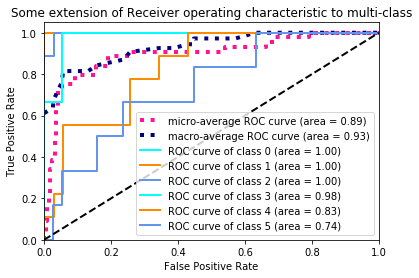

In [267]:
# First aggregate all false positive rates
lw=2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [186]:
# f ii 
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.naive_bayes import GaussianNB



LP_Acc_multi_gauss = pd.DataFrame({'Accuracy Score':[],'L':[]})
class_list=[]
rfv_gridscr= []
n_features = []
feature_list = []

n=0
for df in df_multi_list:
    #c_dict = {}
    df = df.loc[:,~df.columns.duplicated()]
    print(n)
    
    train = df[df['data']=='train']
    train = train.loc[:,~train.columns.duplicated()]
    test = df[df['data']=='test']
    test = test.loc[:,~test.columns.duplicated()]
    test.drop('data',inplace=True,axis=1)
    train.drop('data',inplace=True,axis=1)
    
    #for C in range(1,100):
    clf2 = GaussianNB()
    clf2.fit(train.drop('activity',axis=1),train['activity'])
    y_pred = clf2.predict(test.drop('activity',axis=1))
    y_pred1 = clf2.predict(train.drop('activity',axis=1))

    p = train.drop('activity',axis=1).shape[1]
    l = n
    Acc_Score=accuracy_score(test['activity'],y_pred)
    #c_dict[C] = Acc_Score
           
        
    class_list.append(classification_report(y_pred1,train['activity']))
    n=n+1
    df_1 = {'Accuracy Score':Acc_Score,'L':n,'C':max(c_dict, key=c_dict.get)} 
    LP_Acc_multi_gauss = LP_Acc_multi_gauss.append(df_1,ignore_index=True,sort=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [187]:
LP_Acc_multi_naive

,Accuracy Score,L,C
0,0.947368,1.0,2.0
1,0.947368,2.0,2.0
2,0.842105,3.0,2.0
3,0.947368,4.0,2.0
4,0.894737,5.0,2.0
5,0.789474,6.0,2.0
6,0.842105,7.0,2.0
7,0.842105,8.0,2.0
8,0.736842,9.0,2.0
9,0.736842,10.0,2.0


In [188]:
from sklearn.naive_bayes import MultinomialNB



LP_Acc_multi_naive = pd.DataFrame({'Accuracy Score':[],'L':[]})
class_list=[]
rfv_gridscr= []
n_features = []
feature_list = []

n=0
for df in df_multi_list:
    #c_dict = {}
    df = df.loc[:,~df.columns.duplicated()]
    print(n)
    
    train = df[df['data']=='train']
    train = train.loc[:,~train.columns.duplicated()]
    test = df[df['data']=='test']
    test = test.loc[:,~test.columns.duplicated()]
    test.drop('data',inplace=True,axis=1)
    train.drop('data',inplace=True,axis=1)
    
    #for C in range(1,100):
    clf2 = MultinomialNB()
    clf2.fit(train.drop('activity',axis=1),train['activity'])
    y_pred = clf2.predict(test.drop('activity',axis=1))
    y_pred1 = clf2.predict(train.drop('activity',axis=1))

    p = train.drop('activity',axis=1).shape[1]
    l = n
    Acc_Score=accuracy_score(test['activity'],y_pred)
    #c_dict[C] = Acc_Score
           
        
    class_list.append(classification_report(y_pred1,train['activity']))
    n=n+1
    df_1 = {'Accuracy Score':Acc_Score,'L':n,'C':max(c_dict, key=c_dict.get)} 
    LP_Acc_multi_naive = LP_Acc_multi_naive.append(df_1,ignore_index=True,sort=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [189]:
LP_Acc_multi_naive

,Accuracy Score,L,C
0,0.736842,1.0,2.0
1,0.736842,2.0,2.0
2,0.789474,3.0,2.0
3,0.789474,4.0,2.0
4,0.789474,5.0,2.0
5,0.842105,6.0,2.0
6,0.842105,7.0,2.0
7,0.842105,8.0,2.0
8,0.842105,9.0,2.0
9,0.842105,10.0,2.0


In [ ]:
# f iii